## Bernoulli Distribution
---

Let us define a random variable $X_i$ $(i=1,\dots,n)$ corresponding to tossing a coin such that
$$
X_i =
	\begin{cases}
	1, & \text{Head is obtained}; \\
	0, & \text{Tail is obtained},
	\end{cases}
$$
and
$$
	P(X_i=1) = \theta,\quad P(X_i=0) = 1-\theta.
$$
Then $X_i$ follows the <font color=red>Bernoulli distribution</font> and its p.m.f. is given by
$$
	p(x_i|\theta) = \theta^{x_i}(1-\theta)^{1-x_i},\quad x_i=0,1.
$$
Then the joint p.f. of $D=(x_1,\dots,x_n)$ is
\begin{align*}
	p(D|\theta) &= \prod_{i=1}^n p(x_i|\theta) = \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} \\
	&= \theta^{y}(1-\theta)^{n-y},\quad y = \sum_{i=1}^n x_i.
\end{align*}
When we regard $p(D|\theta)$ as a function of $\theta$, it is called the <font color=red>likelihood</font> or <font color=red>likelihood function</font>.

## Likelihood of Bernoulli Probability
---

`import` literally imports a package named NumPy in Python. NumPy enable us to use vectors and matrices in Python. It also comes with numerous functions for mathematical computation. `as np` means that we use `np` as a abbreviation of `numpy`.

In [1]:
import numpy as np

`scipy.stats` is a module in SciPy, a Python package for scientific computing. `scipy.stats` includes many functions for statistical analysis.

In [2]:
import scipy.stats as st

`matplotlib.pyplot` is a module in Matplotlib, a Python package for visualizations.

In [3]:
import matplotlib.pyplot as plt

`ipywidgets` is a package for interactive browser controls for Jupyter notebooks. `display` is a function for displaying objects.

In [4]:
import ipywidgets as widgets
from IPython.display import display

`q` is a 101 $\times$ 1 vector that contains a grid, {0.0, 0.01, $\ldots$, 1.0}. The first number in `linspace(0.0, 1.0, 101)` is the starting point, the second is the end point, and the third is the number of grid points.

In [5]:
q = np.linspace(0.0, 1.0, 101)

`print` shows the content of `q`.

In [6]:
print(q)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


`x` is the data set {1, 0, 1, 1, 1}. We store it in a `NumPy` array named `x`.

In [7]:
x = np.array([1, 0, 1, 1, 1])

`def` is used to define a new function. In the following cell, the likelihood function of a Bernoulli distribution is defined.

In [8]:
def bernoulli_likelihood(x, q):
    n = len(x)
    y = np.sum(x)
    return q ** y * (1.0 - q) ** (n - y)

The following cell creates a graph of the likelihood.

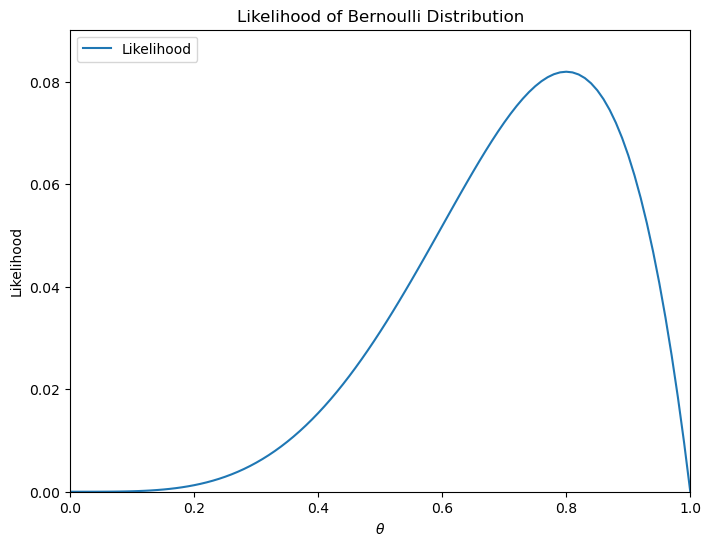

In [9]:
likelihood = bernoulli_likelihood(x, q)
plt.figure(figsize=(8, 6))
plt.plot(q, likelihood, label='Likelihood')
plt.xlabel('$\\theta$')
plt.ylabel('Likelihood')
plt.title('Likelihood of Bernoulli Distribution')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.1 * np.max(likelihood))
plt.legend(loc='upper left')
plt.show()

So far we suppose the size of the dataset is 5. Let $n$ denote the size of the dataset and see how it affects the shape of the likelihood. The following cell defines an intercative plot of the likelihood.

In [10]:
def interactive_likelihood_plot(full_x):
    maxsize = full_x.size
    n_slider = widgets.IntSlider(min=1, max=maxsize, step=1, value=10, description='n:')
    q = np.linspace(0.001, 0.999, 1000)

    def likelihood_plot(n):
        current_x = full_x[:n]
        likelihood = bernoulli_likelihood(current_x, q)
        plt.figure(figsize=(8, 6))
        plt.plot(q, likelihood, label='Likelihood')
        plt.xlabel('$\\theta$')
        plt.ylabel('Likelihood')
        plt.title(f'Likelihood of Bernoulli Distribution (n={n})')
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 1.1 * np.max(likelihood))
        plt.legend(loc='upper left')
        plt.show()

    return widgets.interactive(likelihood_plot, n=n_slider)

To create an interative plot, we first genearate 500 random variables from $\text{Bernoulli}(0.8)$ and use the first $n$ values as the dataset. In the next cell, `rng.binomial(1, theta0, size=n)` generates `n` pseudo-random numbers from the Bernoulli distribution with probability of success `theta0`.

In [11]:
rng = np.random.default_rng(seed=99)
theta0, maxsize = 0.8, 500
full_x = rng.binomial(1, theta0, size=maxsize)
interactive_likelihood_plot(full_x)

interactive(children=(IntSlider(value=10, description='n:', max=500, min=1), Output()), _dom_classes=('widget-…

The following cell draws a plot to illustrate two kinds of prior distribution for the probability of sucess in the Bernoulli distribution.

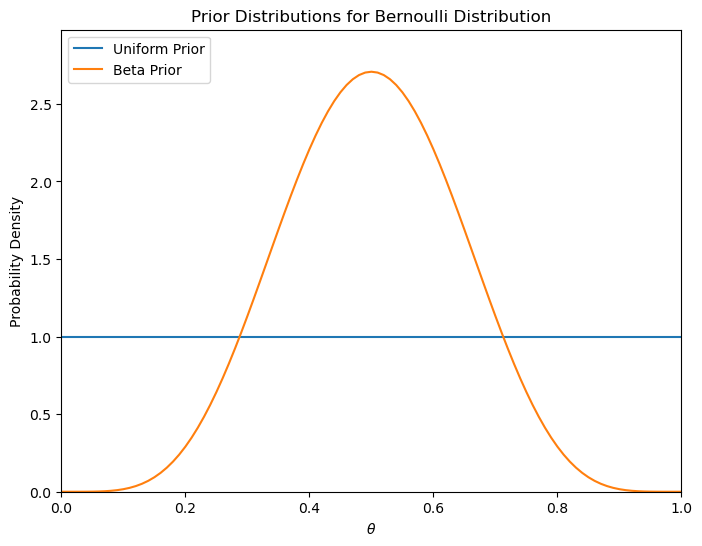

In [12]:
uniform_pdf = st.uniform.pdf(q)
beta_pdf = st.beta.pdf(q, 6, 6)
plt.figure(figsize=(8, 6))
plt.plot(q, uniform_pdf, label='Uniform Prior')
plt.plot(q, beta_pdf, label='Beta Prior')
plt.xlabel('$\\theta$')
plt.ylabel('Probability Density')
plt.title('Prior Distributions for Bernoulli Distribution')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.1 * np.max(beta_pdf))
plt.legend(loc='upper left')
plt.show()

The <font color=red>uniform distribution</font> $\text{Uniform}(a, b)$ is

$$
 p(x|a,b) =
 \begin{cases}
 \frac1{b-a}, & (a\leqq x \leqq b); \\
 0, & (\text{otherwise}).
 \end{cases}
$$

In the above figure, we set $a=0$ and $b=1$. `st.uniform.pdf(x, loc=a, scale=b-a)` in `scipy.stats` computes the pdf of the uniform distribution $\text{Uniform}(a, b)$.

The <font color=red>beta distribution</font> $\text{Beta}(\alpha, \beta)$ is

$$
 p(x|\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)},\ 0\leqq x\leqq 1,
$$

where $B(\alpha,\beta)$ is the beta function:

$$
 B(\alpha,\beta) = \int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx.
$$

`st.beta.pdf(x, a, b)` in `scipy.stats` computes the pdf of the beta distribution $\text{Beta}(a, b)$.

## Beta Distribution
---

The shape of a beta distribution depends on two parameters: $\alpha$ and $\beta$. The following cell creates an interactive plot in which you may play around with various parameter settings. Use two sliders labeled "$\alpha$" and "$\beta$" to see how these parameters affect the shape of the distribution.

In [13]:
def interactive_beta_plot():
    a_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='$\\alpha$:')
    b_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='$\\beta$:')
    q = np.linspace(0.001, 0.999, 1000)

    def beta_plot(a, b):
        beta_pdf = st.beta.pdf(q, a, b)
        plt.figure(figsize=(8, 6))
        plt.plot(q, beta_pdf, label=f'Beta({a:.3f}, {b:.3f})')
        plt.xlabel('$\\theta$')
        plt.ylabel('Probability Density')
        plt.title('Beta Distribution')
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 1.1 * np.max(beta_pdf) if np.max(beta_pdf) > 0 else 1.0)
        plt.legend(loc='best')
        plt.show()
    return widgets.interactive(beta_plot, a=a_slider, b=b_slider)

interactive_beta_plot()

interactive(children=(FloatLogSlider(value=1.0, description='$\\alpha$:', max=2.0, min=-2.0), FloatLogSlider(v…

## Numerical Example of the Posterior Distribution: Discrete Prior Case
---

We suppose candidates for the true value are limited as

$$
 \theta\in\{0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0\},
$$

and each candidate is equally likely, that is, the prior distribution is a discrete uniform distribution:

$$
 \Pr\{\theta = 0.0\} = \Pr\{\theta = 0.1\} = \cdots = \Pr\{\theta = 0.9\} = \cdots = \Pr\{\theta = 1.0\} = \frac{1}{11}.
$$


In [14]:
import pandas as pd

`pandas` is a Python package for data analysis. `display` is used to show a Pandas dataframe in the Jupyter Notebook.

In [15]:
theta = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
prior = np.ones(11) / 11.0
likelihood = bernoulli_likelihood(x, theta)
posterior = (likelihood * prior) / np.sum(likelihood * prior)
table = pd.DataFrame(np.vstack((theta, prior, likelihood, posterior)).T,
                     columns=['$\\theta$','$p(\\theta)$','$p(D|\\theta)$','$p(\\theta|D)$'])
display(table.set_index('$\\theta$'))

,$p(\theta)$,$p(D|\theta)$,$p(\theta|D)$
$\theta$,,,
0.0,0.090909,0.00000,0.000000
0.1,0.090909,0.00009,0.000277
0.2,0.090909,0.00128,0.003938
0.3,0.090909,0.00567,0.017443
0.4,0.090909,0.01536,0.047254
0.5,0.090909,0.03125,0.096139
0.6,0.090909,0.05184,0.159483
0.7,0.090909,0.07203,0.221597
0.8,0.090909,0.08192,0.252023


## Derivation of the Posterior Distribution of $\theta$ with a Beta Prior
---

Suppose the prior distribution is $\text{Beta}(\alpha_0,\beta_0)$.

The posterior distribution of $\theta$ is given by

\begin{align*}
 p(\theta|D) &\propto p(D|\theta)p(\theta) \\
 &\propto \theta^{y}(1-\theta)^{n-y} \times \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \\
 &\propto \theta^{y+\alpha_0-1}(1-\theta)^{n-y+\beta_0-1} \\
 &\propto \theta^{\alpha_\star-1}(1-\theta)^{\beta_\star-1},\\
 \alpha_\star &=y+\alpha_0,\quad \beta_\star=n-y+\beta_0.
\end{align*}

This is the beta distribution $\text{Beta}(\alpha_\star,\beta_\star)$.

As you may notice, the posterior distribution belongs to the same family of distribution as the prior. This type of prior distribution is called the <font color=red>natural conjugate prior distribution</font>.

## Numerical Example of the Posterior Distribution: Beta Prior Case
---

Let us see how the hyper-parameters $(\alpha_0, \beta_0)$ and the sample sizes $n$ affect the shape of the posterior distribution. `interactive_bernoulli_posterior_plot` creates an interactive plot with three sliders for tuning the hyper-parameters (`a0`, `b0`) and the sample size `n`.

In [16]:
def interactive_bernoulli_posterior_plot(full_x):
    maxsize = full_x.size
    a_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='$\\alpha_{0}$:')
    b_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='$\\beta_{0}$:')
    n_slider = widgets.IntSlider(min=1, max=maxsize, step=1, value=10, description='n:')
    q = np.linspace(0.001, 0.999, 1000)

    def bernoulli_posterior_plot(a0, b0, n):
        current_x = full_x[:n]
        current_y = np.sum(current_x)
        a_star = current_y + a0
        b_star = n - current_y + b0
        prior_pdf = st.beta.pdf(q, a0, b0)
        posterior_pdf = st.beta.pdf(q, a_star, b_star)
        plt.figure(figsize=(8, 6))
        plt.plot(q, prior_pdf, label=f'Prior: Beta({a0:.3f}, {b0:.3f})')
        plt.plot(q, posterior_pdf, label=f'Posterior: Beta({a_star:.3f}, {b_star:.3f})')
        plt.xlabel('$\\theta$')
        plt.ylabel('Probability Density')
        plt.title(f'Posterior Distribution for Bernoulli Distribution (n={n})')
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 1.1 * np.max(posterior_pdf))
        plt.legend(loc='best')
        plt.show()

    return widgets.interactive(bernoulli_posterior_plot, a0=a_slider, b0=b_slider, n=n_slider)

In [17]:
rng = np.random.default_rng(seed=99)
theta0, maxsize = 0.5, 500
full_x = rng.binomial(1, theta0, size=maxsize)
interactive_bernoulli_posterior_plot(full_x)

interactive(children=(FloatLogSlider(value=1.0, description='$\\alpha_{0}$:', max=2.0, min=-2.0), FloatLogSlid…

Bayes' theorem is rearranged as

\begin{equation*}
 \frac{p(\theta|D)}{p(\theta)} = \frac{p(D|\theta)}{p(D)}.
\end{equation*}

Therefore

\begin{equation*}
\frac{p(\theta|D)}{p(\theta)} \gtreqqless 1\quad \text{if and only if}\quad \frac{p(D|\theta)}{p(D)} \gtreqqless 1.
\end{equation*}

Since

\begin{equation*}
\begin{cases}
 \displaystyle
 \frac{p(\theta|D)}{p(\theta)} > 1, & \text{plausibility of $\theta$ is increased}; \\
 \\
 \displaystyle
 \frac{p(\theta|D)}{p(\theta)} < 1, & \text{plausibility of $\theta$ is decreased},
\end{cases}
\end{equation*}

the plausibility of a specific value of $\theta$ depends on whether its likelihood $p(D|\theta)$ is higher than the marginal likelihood $p(D)$.

## Beysian Inferernce with the Posterior Distribution
----

The posterior distribution $p(\theta|D)$ embodies all available information about unknown parameter(s), $\theta$. When the number of parameters to be analyzed is relatively small, displaying graphs of all (marginal) posterior distributions may be sufficient to convey useful insights on the parameters to readers.

However, when we need to analyze many parameters, it is impractical and pointless to show all graphs on the parameters in an article or report. In practice, we calculate and report several "summary statistics" that show us key characteristics of the posterior distribution. We call them the <font color=red>posterior statistics</font>.

## Point Estimation
---

On many occasions, we need to report one particular value of the parameter we regard as the most plausible guess. This type of value is called an  <font color=red>estimate</font> and a procedure to obtain an estimate is called  <font color=red>point estimation</font>.

In Bayesian statistics, an estimate of the parameter is defined as a value that minimize the expected loss.

\begin{align*}
 \delta_\star
 &= \arg\min_{\delta}\mathrm{E}_{\theta}[L(\theta,\delta)|D] \\
 &= \arg\min_{\delta}\int_{\Theta}L(\theta,\delta)p(\theta|D)d\theta,
\end{align*}

where $L$ is the <font color=red>loss function</font> and $\Theta$ is a set of all possible values of $\theta$ (<font color=red>parameter space</font>).

| loss function  | $L(\theta,\delta)$        | point estimate
|:---------------|:-------------------------:|:------------------|
| quadratic loss | $(\theta-\delta)^2$       | posterior mean
| absolute loss  | $|\theta-\delta|$         | posterior median
| 0-1 loss       | $1-\mathbf{1}_\theta(\delta)$ | posterior mode

Let us make a figure of three loss functions where the ture valeu of $\theta$ is $\frac12$.

## Numerical Example of Point Estimation: Discrete Prior Case
---

In [18]:
Theta = np.tile(theta, (11, 1))
quad_loss = np.square(Theta - Theta.T)
abs_loss = np.abs(Theta - Theta.T)
zero_one_loss = np.ones((11, 11)) - np.eye(11)
expected_quad_loss = quad_loss @ posterior
expected_abs_loss = abs_loss @ posterior
expected_zero_one_loss = zero_one_loss @ posterior
table = pd.DataFrame(np.vstack((theta,
                                prior,
                                likelihood,
                                posterior,
                                expected_quad_loss,
                                expected_abs_loss,
                                expected_zero_one_loss)).T,
                     columns=['$\\theta$',
                              '$p(\\theta)$',
                              '$p(D|\\theta)$',
                              '$p(\\theta|D)$',
                              '$\text{E}[(\\theta-\\delta)^{2}]$',
                              '$\text{E}[|\\theta-\\delta|]$',
                              '$\text{E}[1-1_{\\theta}(\\delta)]$'])
display(table.set_index('$\\theta$'))

,$p(\theta)$,$p(D|\theta)$,$p(\theta|D)$,$\text{E}[(\theta-\delta)^{2}]$,$\text{E}[|\theta-\delta|]$,$\text{E}[1-1_{\theta}(\delta)]$
$\theta$,,,,,,
0.0,0.090909,0.00000,0.000000,0.524112,0.707107,1.000000
0.1,0.090909,0.00009,0.000277,0.392690,0.607107,0.999723
0.2,0.090909,0.00128,0.003938,0.281269,0.507162,0.996062
0.3,0.090909,0.00567,0.017443,0.189848,0.408005,0.982557
0.4,0.090909,0.01536,0.047254,0.118426,0.312337,0.952746
0.5,0.090909,0.03125,0.096139,0.067005,0.226119,0.903861
0.6,0.090909,0.05184,0.159483,0.035584,0.159129,0.840517
0.7,0.090909,0.07203,0.221597,0.024162,0.124036,0.778403
0.8,0.090909,0.08192,0.252023,0.032741,0.133263,0.747977


## Interval Estimation
---

1. <font color=red>Credible Interval (CI)</font> <br>
The credible interval of $\theta$ is an interval $[a_c, b_c]$ such that

  * $P(a_c \leqq \theta \leqq b_c|D) = 1-c$,
  * $P(\theta < a_c|D) = \frac{c}2$ and $P(\theta > b_c|D\} = \frac{c}2$.

2. <font color=red>Highest Posterior Density Interval (HPDI)</font>

   The highest posterior density interval of $\theta$ is an interval $[a_c, b_c]$ such that

  * $P(a_c \leqq \theta \leqq b_c|D) = 1-c$,
  * for any pair $(\theta,\theta^{\prime})$ such that $\theta\in[a_c, b_c]$ and $\theta^{\prime}\notin [a_c, b_c]$, $p(\theta|D) > p(\theta^{\prime}|D)$ must hold.

   In particular, if the distribution is unimodal (it has the unique mode), the HPDI must satisfy

\begin{align*}
 P(a_c \leqq \theta \leqq b_c|D) &= 1-c, \\
 p(a_c|D) &= p(b_c|D).
\end{align*}

To find the solution of the above nonlinear equations, we import a module called `scipy.optimize` that includes a function for that purpose: `root`.

In [19]:
import scipy.optimize as opt

The following cell defines a function `beta_hpdi` that returns the $100\times$ `prob` % HPDI of the beta distribution $\text{Beta}(\alpha,\beta)$.

In [20]:
def beta_hpdi(prob, alpha, beta, ci0=None):
    def hpdi_conditions(v, p, a, b):
        eq1 = st.beta.cdf(v[1], a, b) - st.beta.cdf(v[0], a, b) - p
        eq2 = st.beta.pdf(v[1], a, b) - st.beta.pdf(v[0], a, b)
        return np.hstack((eq1, eq2))
    if not ci0:
        ci0 = st.beta.interval(prob, alpha, beta)
    return opt.root(hpdi_conditions, ci0, args=(prob, alpha, beta)).x

The nested function `hdpi_conditions` in `beta_hpdi` returns a vector such that

$$
 \begin{bmatrix}
 P(\theta\leqq b|D) - P(\theta \leqq a|D) - p \\
 p(b|D) - p(a|D)
 \end{bmatrix},
$$

where $p=1-c$ and $P(\theta\leqq b|D) - P(\theta \leqq a|D) = P(a \leqq \theta \leqq b|D)$.

So if we find a pair $[a, b]$ that makes the above vector equal to zero, such a pair is regarded as the 100p% HPDI. This is done by the function `root` in `scipy.optimize`.

A general syntax of `root` is as follows.
```Python
root(f, initial_value, arg=(arguments_of_f))
```
`root` finds a solution of `f`, i.e., a vector $x$ such that $f(x)=0$, by using a seach algorithm. `initial_value` is the starting point of the search algorithm. `arg` is a tuple containing arguments to be passed to `f`.

`bernoulli_stats` computes posterior statistics (mean, median, mode, standard deviation, CI, HPDI). The following are standard methods for descriptive statistics:

+ `interval` - interval
+ `mean` - mean
+ `median` - median
+ `std` - standard deviation (the square root of the variance)

`DataFrame` converts a matrix (NumPy 2D array) into a Pandas dataframe.

In [21]:
def bernoulli_stats(data, hyper_param, prob=0.95):
    a0 = hyper_param['a0']
    b0 = hyper_param['b0']
    n = data.size
    sum_data = data.sum()
    a = sum_data + a0
    b = n - sum_data + b0
    mean_pi = st.beta.mean(a, b)
    median_pi = st.beta.median(a, b)
    mode_pi = (a - 1.0) / (a + b - 2.0)
    sd_pi = st.beta.std(a, b)
    ci_pi = st.beta.interval(prob, a, b)
    hpdi_pi = beta_hpdi(prob, a, b)
    stats = np.hstack((mean_pi, median_pi, mode_pi, sd_pi, ci_pi, hpdi_pi))
    stats = stats.reshape((1, 8))
    lower = 0.5 * (1.0 - prob) * 100.0
    upper = 0.5 * (1.0 + prob) * 100.0
    stats_string = ['mean', 'median', 'mode', 'sd',
                    f'ci ({lower:4.1f}%)', f'ci ({upper:4.1f}%)',
                    f'hpdi ({lower:4.1f}%)', f'hpdi ({upper:4.1f}%)']
    param_string = ['$\\theta$']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, a, b

In the following cell, we generate 10 pseudo-random numbers from the Bernoulli distribution with $\theta=\frac12$ and compute the posterior statistics with `bernoulli_stats`.

In [22]:
theta0, n = 0.5, 10
hyper_param = dict(
    a0 = 1.0,
    b0 = 1.0
)
data = rng.binomial(1, theta0, size=n)
results, a, b = bernoulli_stats(data, hyper_param)
display(results)

,mean,median,mode,sd,ci ( 2.5%),ci (97.5%),hpdi ( 2.5%),hpdi (97.5%)
$\theta$,0.416667,0.41189,0.4,0.136735,0.167488,0.692095,0.158572,0.681768


## Bayes Factor
---

In statistics, either Bayesian or non-Bayesian, a hypothesis on the parameter(s) is a region or interval where the true value of the parameter is supposed to be located. In general, a hypothesis $H_i$ under which the true value of  $\theta$ is located in a region $S_i\subset\Theta$ is expressed as

\begin{equation*}
 H_i:\; \theta\in S_i, \quad i=0,1,2,\dots
\end{equation*}

In Bayesian statistics, plausibility of a hypothesis is measured by the posterior probability that the true value of $\theta$ is located in $S_i$, that is,

$$
 P(H_i|D) = P(\theta\in S_i|D) = \int_{S_i}p(\theta|D)d\theta.
$$

Competing hypotheses can be compared by the <font color=red>Bayes factor</font>, which is defined as

$$
 \text{Bayes factor} = \mathrm{B}_{ij}
 = \frac{P(H_i|D)}{P(H_j|D)}\div\frac{P(H_i)}{P(H_j)}
 = \frac{\text{Posterior odds ratio}}{\text{Prior odds ratio}}.
$$

| Rank | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Bayes factor $\mathrm{B}_{ij}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Support for $H_j$ |
|:----:|:---------------------------------------------:|:-----------------------:|
|    0 | $0 < \log_{10}(\mathrm{B}_{ij})$              | Rejected                |
|    1 | $-\frac12 < \log_{10}(\mathrm{B}_{ij}) < 0$   | Barely worth mentioning |
|    2 | $ -1 < \log_{10}(\mathrm{B}_{ij}) < -\frac12$ | Substantial             |
|    3 | $-\frac32< \log_{10}(\mathrm{B}_{ij}) < -1$   | Strong                  |
|    4 | $-2 < \log_{10}(\mathrm{B}_{ij}) < -\frac32$  | Very strong             |
|    5 | $\log_{10}(\mathrm{B}_{ij}) < -2$             | Decisive                |

We want to check whether the true value of $\theta$ is more than 50% or not, i.e.,

$$
 \begin{cases}
 H_0:\ & \theta \leqq 0.5; \\
 H_1:\ & \theta > 0.5.
 \end{cases}
$$

When $\theta$ is the true vote share of a candidate, supporting $H_1$ implies that this candidate won the election.

Suppose the true $\theta$ is 60% and we generate 500 observations from the Bernoulli distribution with $\theta=60\%$.

In [23]:
theta0, a0, b0, n = 0.6, 1.0, 1.0, 500
data = rng.binomial(1, theta0, size=n)
y = np.sum(data)
a_star = y + a0
b_star = n - y + b0
Prior_odds = st.beta.cdf(0.5, a0, b0) / (1.0 - st.beta.cdf(0.5, a0, b0))
Posterior_odds = st.beta.cdf(0.5, a_star, b_star) / (1.0 - st.beta.cdf(0.5, a_star, b_star))
Bayes_factor = Posterior_odds / Prior_odds
print(np.array([np.log10(Prior_odds), np.log10(Posterior_odds), np.log10(Bayes_factor)]))

[ 0.         -3.76690679 -3.76690679]


In this example, the prior odds ratio is 1. So the Bayes factor is identital to the posterior odds ratio. The Bayes factor suggests that $H_1$ is decisively supported by the evidence. Thus we can safely call the election for this candidate.

## Savage-Dickey Density Ratio
---

The <font color=red>Savage-Dickey density ratio</font> (<font color=red>SDDR</font>) is the Bayes factor specifically designed for 

$$
 \begin{cases}
 H_0:\ & \theta = \theta_0; \\
 H_1:\ & \theta \ne \theta_0.
 \end{cases}
$$

The SDDR is based on the spike-and-slab prior:

$$
 p(\theta) = p_0 \delta(\theta-\theta_0) + (1-p_0)f(\theta),\quad 0 < p_0 < 1,
$$

where the choice of $p_0$ is arbitrary. The SDDR is given by

$$
 \mathrm{B}_{01} = \frac{f(\theta_0|D)}{f(\theta_0)},
$$

where $f(\theta|D)$ is the posterior distribution when $\theta\ne\theta_0$, i.e.,

$$
 f(\theta|D)= \frac{p(D|\theta)f(\theta)}{\int_{\Theta}p(D|\theta)f(\theta)d\theta}.
$$

As an illustration, we test the following hypotheses 

$$
 \begin{cases}
 H_0:\ & \theta = 0.5; \\
 H_1:\ & \theta \ne 0.5.
 \end{cases}
$$

with the SDDR. We use $\text{Beta}(1,1)$ (the uniform distribution between 0 and 1) as $f$ in the spike-and-slab prior.

In [24]:
SDDR = st.beta.pdf(0.5, a_star, b_star) / st.beta.pdf(0.5, a0, b0)
print(np.log10(SDDR))

-1.5337675550230572


The SDDR suggests that $H_1$ is strongly supported. So we may conclude that the true value of $\theta$ is not equal to 50%.